In [172]:
import sys
import os

# Get the absolute path to the project root directory
# This works if your notebook is in a notebooks/ directory one level below the project root
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [173]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from cycler import cycler
from scipy.optimize import curve_fit
from src import clean_data
import numpy.typing as npt
from typing import Tuple

## Input Processing

Import the file skipping the first 18 row
and then select the column and transpose

In [174]:
file_name = "../Data/RLC_time.csv"
data = np.genfromtxt(file_name, skip_header=18, delimiter=",")

for element in data[:10]:
    print(element)

[      nan       nan       nan  2.16e-06 -2.24e-01       nan]
[      nan       nan       nan  2.18e-06 -2.08e-01       nan]
[     nan      nan      nan  2.2e-06 -2.0e-01      nan]
[      nan       nan       nan  2.22e-06 -1.76e-01       nan]
[      nan       nan       nan  2.24e-06 -1.60e-01       nan]
[      nan       nan       nan  2.26e-06 -1.44e-01       nan]
[      nan       nan       nan  2.28e-06 -1.36e-01       nan]
[     nan      nan      nan  2.3e-06 -1.2e-01      nan]
[      nan       nan       nan  2.32e-06 -1.04e-01       nan]
[      nan       nan       nan  2.34e-06 -8.80e-02       nan]


In [175]:
t_data, V_data = clean_data(data)
for x ,y in tuple(zip(t_data,V_data)):
    print(x,y)

2.16e-06 -0.224
2.18e-06 -0.208
2.2e-06 -0.2
2.22e-06 -0.176
2.24e-06 -0.16
2.26e-06 -0.144
2.28e-06 -0.136
2.3e-06 -0.12
2.32e-06 -0.104
2.34e-06 -0.088
2.36e-06 -0.072
2.38e-06 -0.056
2.4e-06 -0.04
2.42e-06 -0.024
2.44e-06 -0.008
2.46e-06 0.008
2.48e-06 0.024
2.5e-06 0.032
2.52e-06 0.048
2.54e-06 0.064
2.56e-06 0.08
2.58e-06 0.096
2.6e-06 0.104
2.62e-06 0.12
2.64e-06 0.136
2.66e-06 0.152
2.68e-06 0.168
2.7e-06 0.184
2.72e-06 0.2
2.74e-06 0.208
2.76e-06 0.224
2.78e-06 0.24
2.8e-06 0.256
2.82e-06 0.264
2.84e-06 0.28
2.86e-06 0.296
2.88e-06 0.312
2.9e-06 0.32
2.92e-06 0.336
2.94e-06 0.344
2.96e-06 0.36
2.98e-06 0.376
3e-06 0.384
3.02e-06 0.4
3.04e-06 0.408
3.06e-06 0.424
3.08e-06 0.44
3.1e-06 0.448
3.12e-06 0.464
3.14e-06 0.472
3.16e-06 0.488
3.18e-06 0.504
3.2e-06 0.512
3.22e-06 0.52
3.24e-06 0.536
3.26e-06 0.544
3.28e-06 0.552
3.3e-06 0.568
3.32e-06 0.584
3.34e-06 0.592
3.36e-06 0.6
3.38e-06 0.608
3.4e-06 0.616
3.42e-06 0.632
3.44e-06 0.64
3.46e-06 0.656
3.48e-06 0.664
3.5e-06 0.672
3

## Plot Parameters

In [176]:
plt.style.use('classic')
params = {'legend.fontsize': '10',
         'legend.loc': 'upper right',
          'legend.frameon':       'True',
          'legend.framealpha':    '0.8',      # legend patch transparency
          'legend.facecolor':     'w', # inherit from axes.facecolor; or color spec
          'legend.edgecolor':     'w',      # background patch boundary color
          'figure.figsize': (6, 4),
         'axes.labelsize': '10',
         'figure.titlesize' : '14',
         'axes.titlesize':'12',
         'xtick.labelsize':'10',
         'ytick.labelsize':'10',
         'lines.linewidth': '1',
#         'text.usetex': True,
#         'axes.formatter.limits': '-5, -3',
         'axes.formatter.min_exponent': '2',
#         'axes.prop_cycle': cycler('color', 'bgrcmyk')
         'figure.subplot.left':'0.125',
         'figure.subplot.bottom':'0.125',
         'figure.subplot.right':'0.925',
         'figure.subplot.top':'0.925',
         'figure.subplot.wspace':'0.1',
         'figure.subplot.hspace':'0.1',
#         'figure.constrained_layout.use' : True
          }
plt.rcParams.update(params)
plt.rcParams['axes.prop_cycle'] = cycler(color=['b','g','r','c','m','y','k'])

<ErrorbarContainer object of 3 artists>

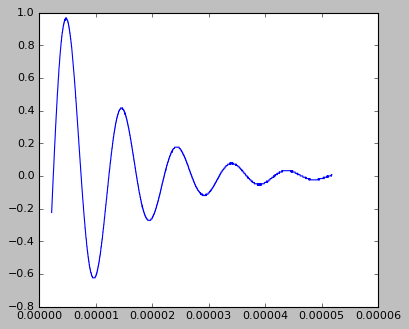

In [177]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4),constrained_layout = True)
ax.errorbar(t_data,V_data)

## Fit Function


In [ ]:
def fitF(x: np.float64, A: np.float64, B: np.float64, C: np.float64)-> np.float64:
    '''Prototype of the function to fit

    Args:
        x (np.float64): Independent Variable Corresponding to t
        A (np.float64): First Parameter corresponding to v0
        B (np.float64): Second Parameter corresponding to lower omega
        C (np.float64): Third Parameter corresponding to lower delta

    Returns:
        np.float64: Dependent Variable corresponding to V
    '''
    omega = np.sqrt(abs(B**2-C**2))
    y = A*np.exp(-C*x)*(C/omega*np.sin(omega*x)-np.cos(omega*x))
    return y

In [179]:
def fitFgen(x: np.float64, A: np.float64, B: np.float64, C: np.float64, S: np.float64, Q: np.float64)-> np.float64:
    '''Prototype of the function to fit

    Args:
        t (np.float64): Independent Variable Corresponding to t
        A (np.float64): First Parameter corresponding to v0
        B (np.float64): Second Parameter corresponding to lower omega
        C (np.float64): Third Parameter corresponding to lower delta
        S (np.float64): Parameter corresponding to a shift in the x direction
        Q (np.float64): Parameter corresponding to a shift in the y direction



    Returns:
        np.float64: Dependent Variable corresponding to V
    '''
    x = x-S
    omega = np.sqrt(abs(B**2-C**2))
    y = A*np.exp(-C*x)*(C/omega*np.sin(omega*x)-np.cos(omega*x))+Q
    return y

## Data Errors

In [180]:
# Assumed reading errors
err_reading_V = 0.02*0.41  # errore di lettura dell'oscilloscopio nel voltaggio 1/10 div * distr.triangolare
err_scale_V = 0.03*0.41 #  errore percentuale dell'oscilloscopio nel voltaggio 3% * distr.triangolare
err_reading_t = 0.5e-6*0.41  # errore di lettura dell'oscilloscopio nel tempo 1/10 div * distr.triangolare

err_V = np.sqrt((err_reading_V)**2 + (err_scale_V * V_data)**2)
err_t = err_reading_t


## First Fit

In [189]:
popt, pcov= curve_fit(fitF,t_data,V_data, p0 = [1, 30000, 1/2.5e-5],method = "lm",sigma = err_V, absolute_sigma= True) 
print(popt)

[-5.10513495e-01 -1.13786423e+05  1.13786428e+05]


In [183]:
popt, pcov= curve_fit(fitFgen,t_data,V_data, p0 = [1, 3000000, 1/2.5e-5, 0 , 0],method = "lm",sigma = err_V, absolute_sigma= True) 
print(popt)
A_BF, B_BF, C_BF, S_BF, Q_BF = popt

[ 3.30816649e+00  6.45973748e+05  8.60668307e+04 -9.59327815e-06
 -2.95765596e-04]


In [182]:
print(len(t_data))
print(t_data)
t_new = t_data[t_data>S_BF]-S_BF
print(t_new)

2482
[2.160e-06 2.180e-06 2.200e-06 ... 5.174e-05 5.176e-05 5.178e-05]
[4.8680696e-07 5.0680696e-07 5.2680696e-07 ... 5.0066807e-05 5.0086807e-05
 5.0106807e-05]
